In [7]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [8]:
df_index = pd.read_csv("economic_index.csv")

In [9]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [10]:
##drop unnecessary column
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

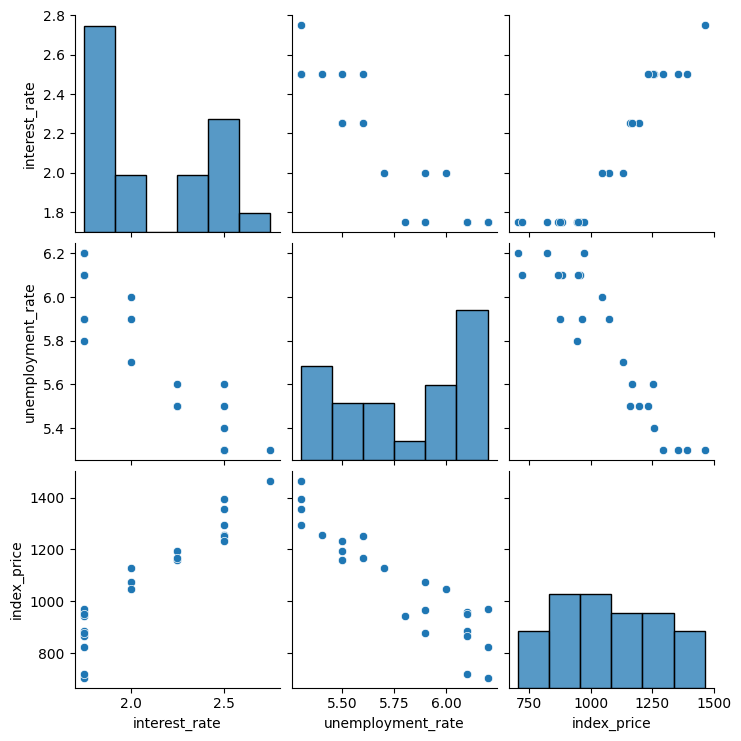

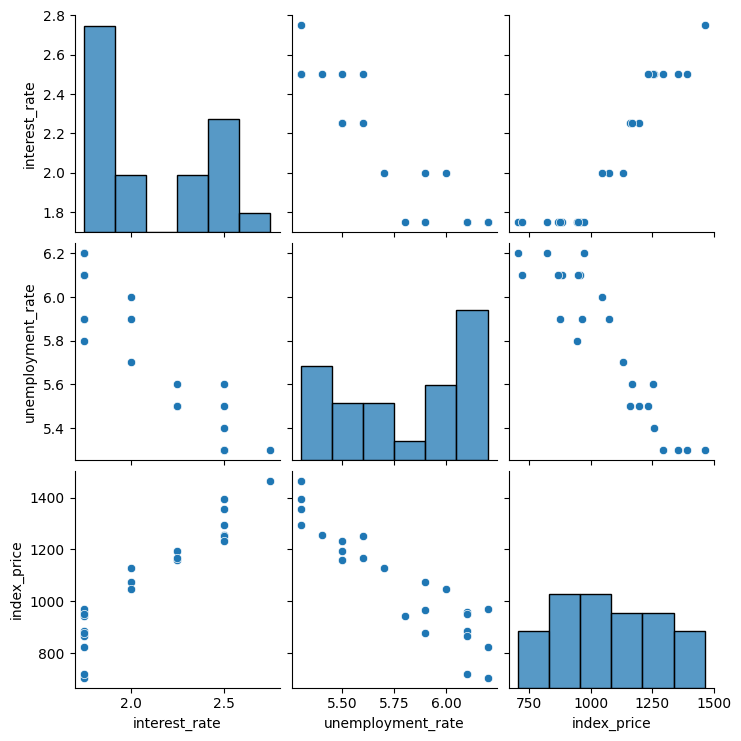

In [15]:
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [17]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


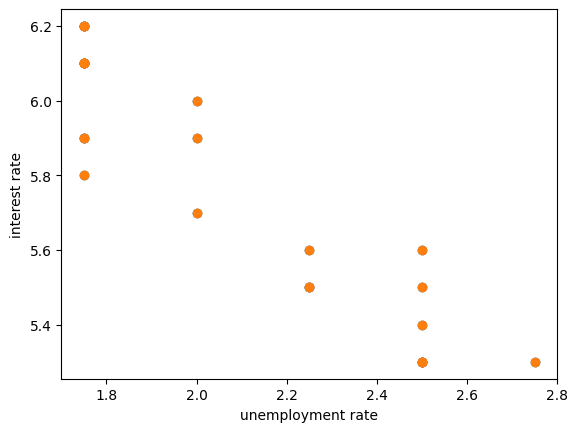

In [19]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'])
plt.ylabel("interest rate")
plt.xlabel("unemployment rate")
plt.show()

In [23]:
##independent and dependent feature 
X=df_index.iloc[:, :-1]
y=df_index.iloc[:,-1]

In [24]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [25]:
import seaborn as sns

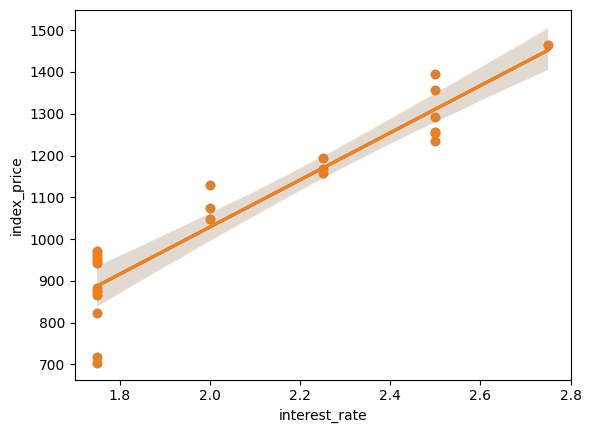

In [29]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])
plt.show()


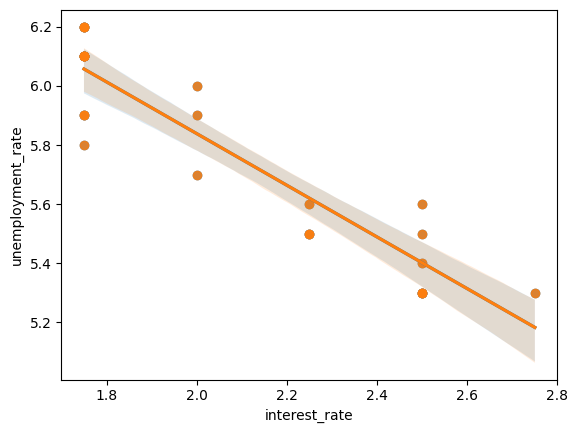

In [33]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])
plt.show()

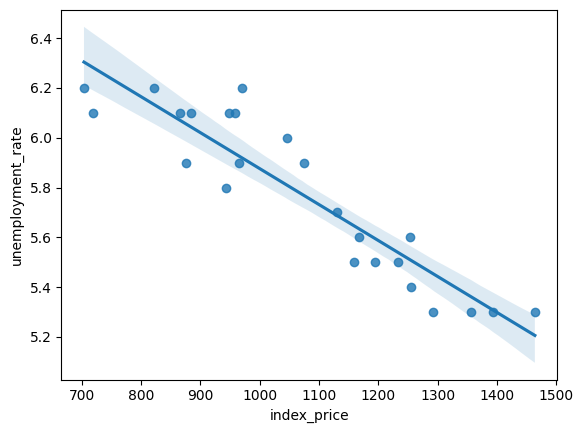

In [35]:
sns.regplot(x=df_index['index_price'], y=df_index['unemployment_rate'])
plt.show()

In [36]:
##scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [ ]:
regression.fit(X_train, y_train)

In [37]:
##cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train,y_train,scoring='neg_mean_squared_error', cv=3)

NameError: name 'regression' is not defined

In [38]:
np.mean(validation_score)

NameError: name 'validation_score' is not defined

In [ ]:
##predictions
y_pred = regression.predict(X_test)


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
residuals=y_test-y_pred
print(residuals)

In [ ]:
sns.displot(residuals, kind='kde')

In [ ]:
plt.scatter(y_pred, residuals)
plt.show()